In [1]:
import lbg_forecast.priors_gp_massfunc as gpmf
import numpy as np
import matplotlib.pyplot as plt
import scipy as sc
import lbg_forecast.utils as utils


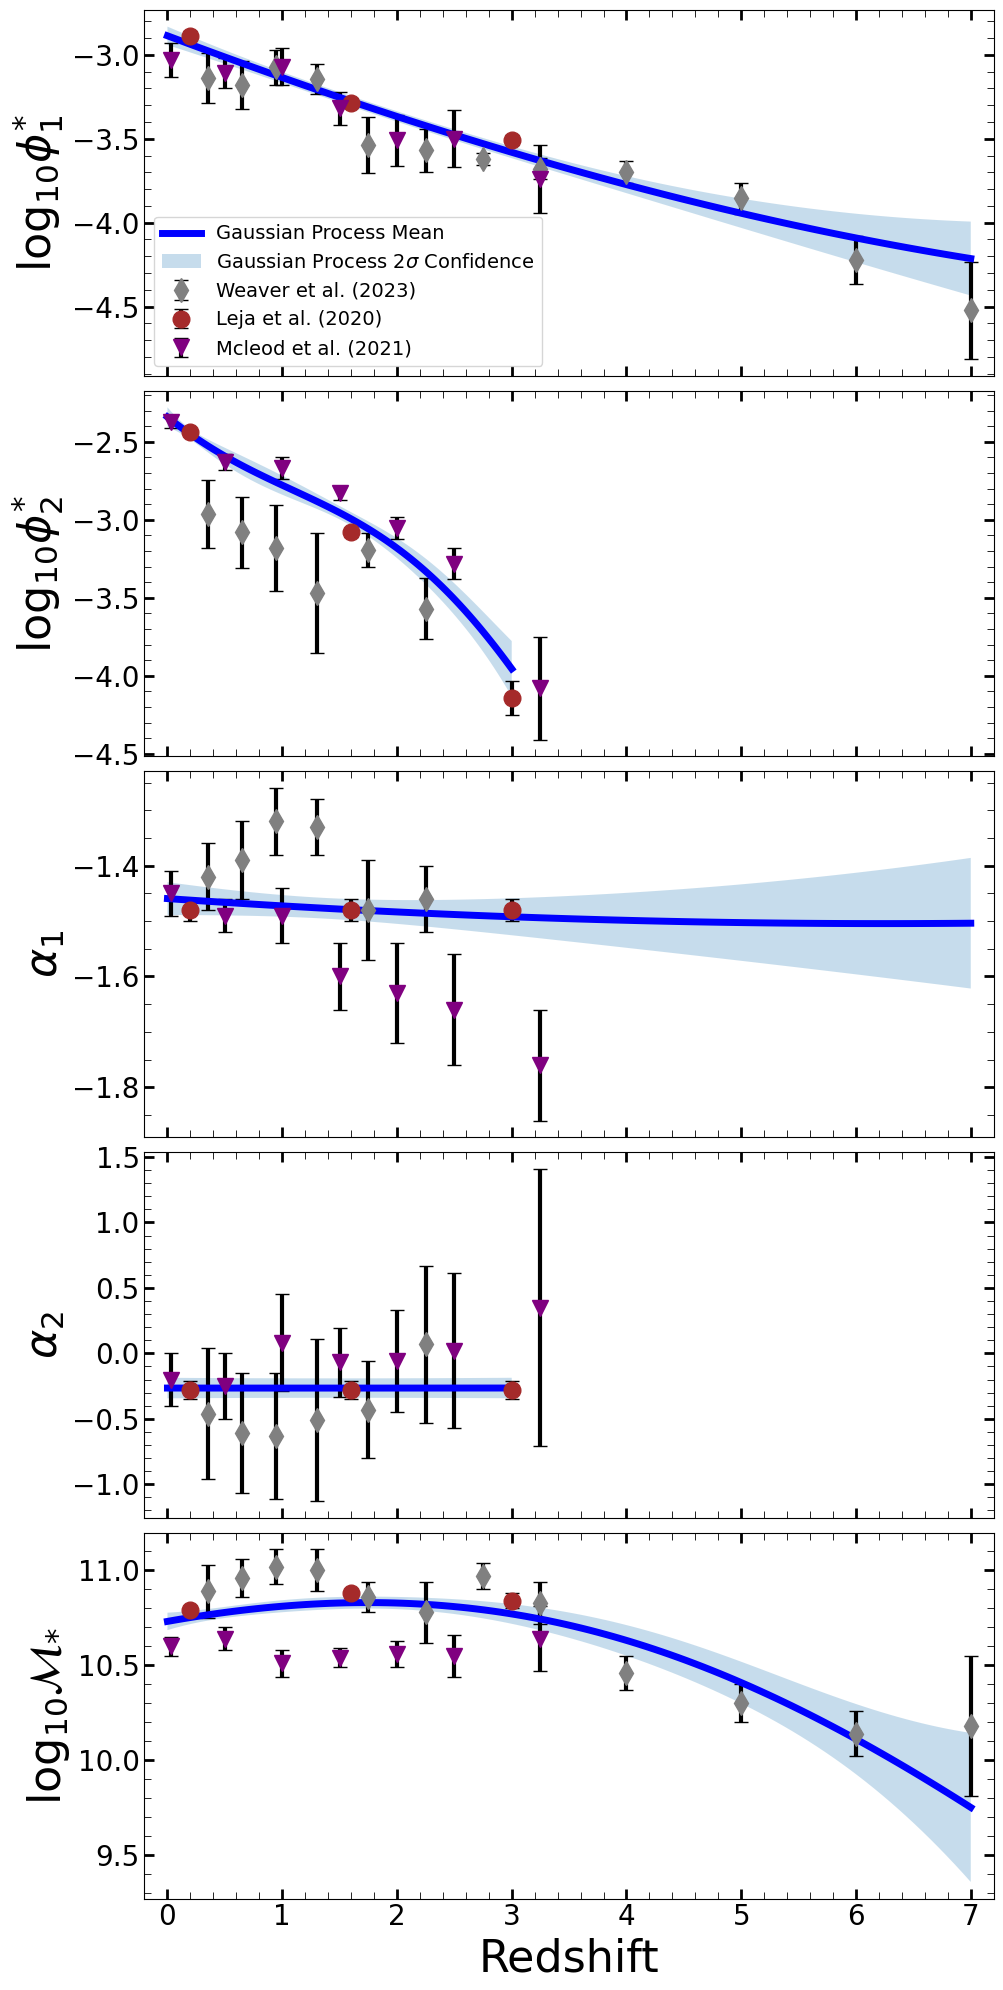

In [2]:
mass_function_prior = gpmf.MassFunctionPrior('.', mean=False)

mass_function_prior.plot_confidence()

In [3]:
print("LSST Number Density: ", mass_function_prior.lsst_number_density(mass_function_prior.sample_prior_mean()))


LSST Number Density:  2582112.4233077243


1.0
LSST Number Density:  nan


/Users/fpetri/repos/LBGforecast/lbg_forecast/priors_gp_massfunc.py:119: RuntimeWarning: invalid value encountered in scalar divide
  return np.trapz(n_z*self.dvdzgrid, self.z_grid)*utils.LSST_AREA_FRACTION/(utils.LSST_AREA_DEG2)#*utils.DEG2_TO_ARCMIN2)


(0.0, 0.018)

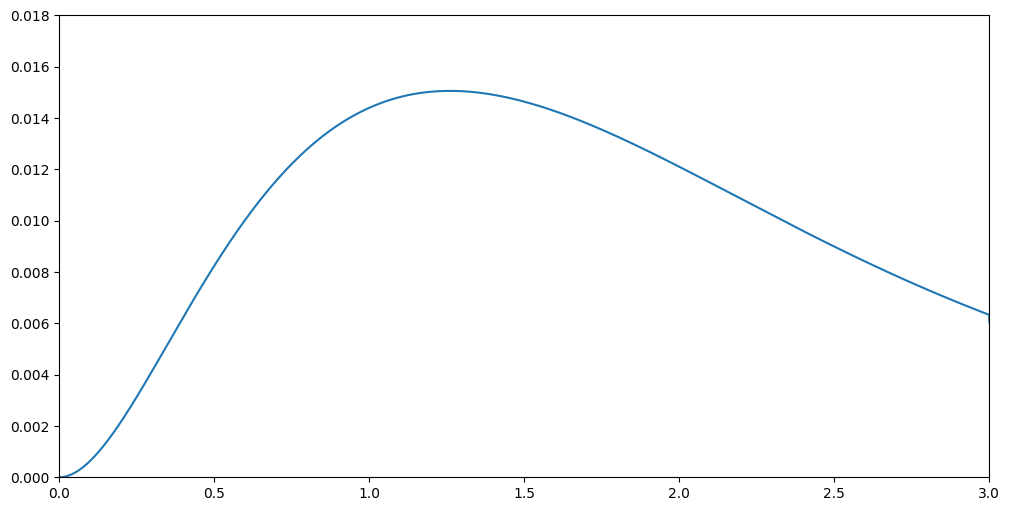

In [ ]:
sparams = mass_function_prior.sample_prior_mean()

f, ax =plt.subplots(1, 1, figsize=(12, 6))

norm = mass_function_prior.n_tot(sparams)
dvdz = mass_function_prior.dvdz(mass_function_prior.z_grid, mass_function_prior.dz)

zs = mass_function_prior.z_grid
logms = mass_function_prior.logm_grid

i=0
n_z=[]
for z in zs:
    n_logm = mass_function_prior.normalised_mass_function(z, mass_function_prior.logm_grid, sparams, norm, dvdz[i])
    n_logm = np.trapz(n_logm, mass_function_prior.logm_grid)
    n_z.append(n_logm)
    i+=1

print(np.trapz(n_z, mass_function_prior.z_grid))
n=[]
i=0
for z in zs:
    n.append(mass_function_prior.normalised_mass_function(z, 10, sparams, norm, dvdz[i]))

    i+=1

ax.plot(zs, n)
ax.set_xlim(0, 3)
ax.set_ylim(0, 0.018)

In [8]:
n_prior_samples = 300
nsamples=200000
zbins = np.linspace(0.0, 7.0, 100)
zarr=[]
#zs=[]
for i in range(n_prior_samples):
    zsamples, msamples = mass_function_prior.sample_logpdf(nsamples)
    z_histogram = np.histogram(zsamples, bins=zbins, density=True)
    #zs.append(zsamples)
    zarr.append(z_histogram[0])



/Users/fpetri/anaconda3/envs/tf_env/lib/python3.11/site-packages/linear_operator/utils/cholesky.py:40: NumericalWarning: A not p.d., added jitter of 1.0e-08 to the diagonal
  warnings.warn(


Calculating Normalisation ... 


KeyboardInterrupt: 

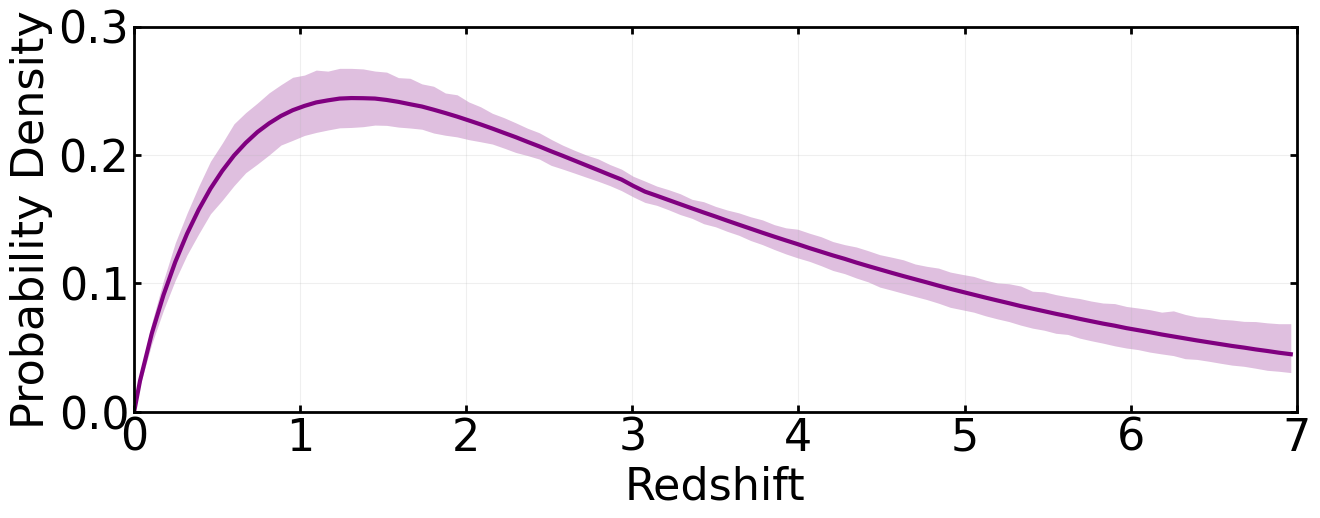

In [27]:
fig = plt.figure(figsize=(15, 5))
ax=fig.gca()

#zs = np.vstack(np.array(zarr))
#np.save("zsamples_unnormalised.npy", zs)

zs= np.load("zsamples_normalised.npy")

p1=50
percentile_zs1 = np.percentile(zs, [100-p1, 50, p1], axis=0)

p2=99
percentile_zs2 = np.percentile(zs, [100-p2, 50, p2], axis=0)

alpha=0.5
colour='purple'

zs_mean = np.concatenate((np.array([0]), np.mean(zs, axis=0)))
z_x = np.concatenate((np.array([0]), (zbins[:-1]+zbins[1:])/2))
upper1 = np.concatenate((np.array([0]), percentile_zs1[2, :]))
upper2 = np.concatenate((np.array([0]), percentile_zs2[2, :]))
lower1 = np.concatenate((np.array([0]), percentile_zs1[0, :]))
lower2 = np.concatenate((np.array([0]), percentile_zs2[0, :]))

fs=32
ax.plot(z_x, zs_mean, lw=3, color='purple', ls='-', label='Mean')
#ax.fill_between(z_x, lower1,  upper1, alpha=alpha, color=colour, lw=0, label=str(100-p1)+"-"+str(p1)+"th Percentiles")
ax.fill_between(z_x, lower2,  upper2, alpha=alpha/2, color=colour, lw=0, label=str(100-p2)+"-"+str(p2)+"th Percentiles")
ax.set_xlabel('Redshift', fontsize=fs)
ax.set_ylabel('Probability Density', fontsize=fs)
ax.tick_params('x', labelsize=fs, width=2, size=5, direction='in', top=True)
ax.tick_params('y', labelsize=fs, width=2, size=5, direction='in', right=True)
ax.grid(visible=True, zorder=-1, alpha=0.2)
ax.set_xlim(0, 7)
ax.set_ylim(0, 0.3)
#ax.legend(fontsize=24)

lw=2
ax.spines['bottom'].set_linewidth(lw)
ax.spines['top'].set_linewidth(lw)
ax.spines['right'].set_linewidth(lw)
ax.spines['left'].set_linewidth(lw)


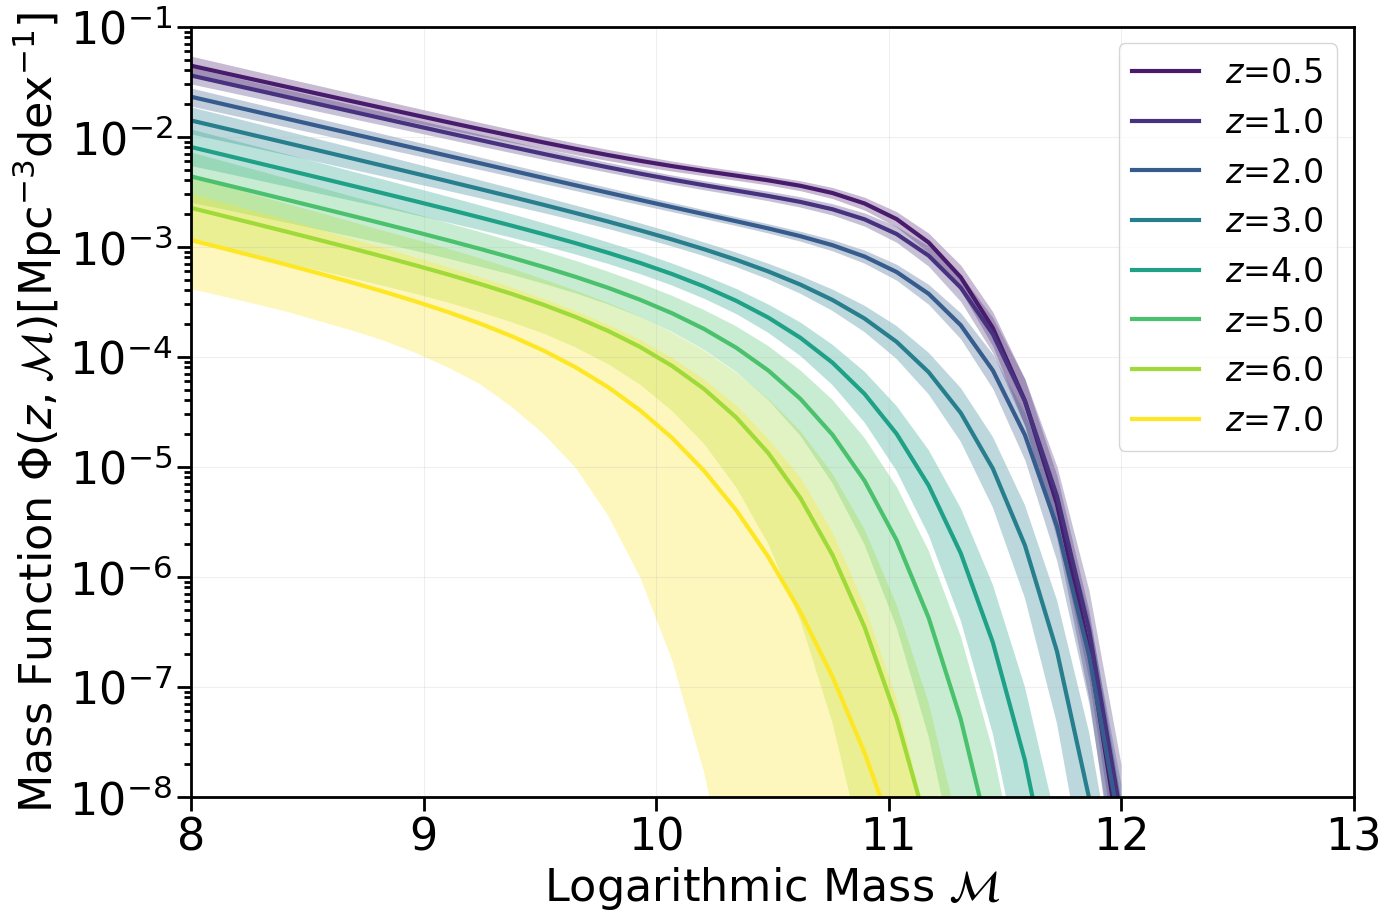

In [152]:
fig = plt.figure(figsize=(15, 10))
ax=fig.gca()

cmap = plt.get_cmap('viridis')

redshift = np.array([0.5, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0])
masses = np.linspace(8, 12, 30)
nsamples = 5000
for z in redshift:
    mfunc_at_z = []
    for n in range(nsamples):
        mfunc = mass_function_prior.mass_function(z, masses, mass_function_prior.sample_prior())
        mfunc_at_z.append(mfunc)

    mfunc_at_z = np.vstack(np.array(mfunc_at_z))
    mfunc_at_z_mean = np.mean(mfunc_at_z, axis=0)
    mfunc_at_z_err = np.percentile(mfunc_at_z, [99, 50, 1], axis=0)

    #print(mfunc_at_z_mean, mfunc_at_z_err[0, :])

    ax.plot(masses, mfunc_at_z_mean, color=cmap(z/7), label="$z$="+str(z), lw=3)
    ax.fill_between(masses, mfunc_at_z_err[0, :],  mfunc_at_z_err[2, :], color=cmap(z/7), alpha=0.3, lw=0)


fs=32            
ax.set_ylim(1e-8, 1e-1)
ax.set_xlim(8, 13)
ax.set_ylabel("Mass Function $\Phi(z, \mathcal{M}) [\mathrm{Mpc}^{-3}\mathrm{dex}^{-1}]$", fontsize=fs)
ax.set_xlabel("Logarithmic Mass $\mathcal{M}$", fontsize=fs)
plt.tick_params('x', labelsize=fs, width=2, size=10)
plt.tick_params('y', labelsize=fs, width=2, size=10)

ax.tick_params(which='minor', width=2, size=5)

ax.set_yscale('log')
ax.legend(loc="best", fontsize=24)
ax.grid(visible=True, zorder=-1, alpha=0.2)

lw=2
ax.spines['bottom'].set_linewidth(lw)
ax.spines['top'].set_linewidth(lw)
ax.spines['right'].set_linewidth(lw)
ax.spines['left'].set_linewidth(lw)